In [1]:
import os
os.chdir("../")

In [11]:
import albumentations as A
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from src.utils.config import load_config

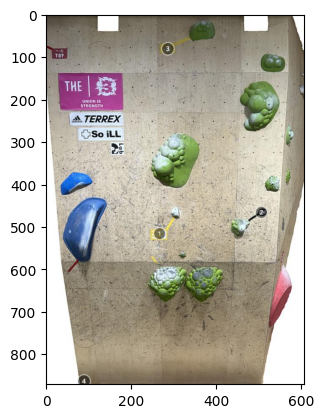

In [59]:
global_config, local_config = load_config()
test_image_filename = "18.jpg"
test_image = cv2.cvtColor(
    cv2.imread(
        local_config["PATH"]["coco_routes"]
        +test_image_filename
    ),
    cv2.COLOR_BGR2RGB,
)
plt.imshow(test_image)

##### PIXEL-LEVEL 
Experimenting on different transformations. Useful:
- Channel shuffle, hue variations (with hold-mask merging)
- Downscale, ImageCompression
- Blurr?
- Emboss
- PixelDistributedAdaptation, FancyPCA, FDA, limited RGBShift (for "ambient" matching)
- RingingOvershoot?

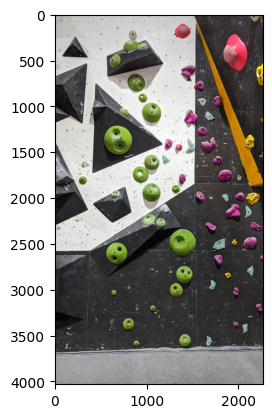

In [24]:
transform = A.Compose([
    A.CLAHE(clip_limit=50, p=0),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

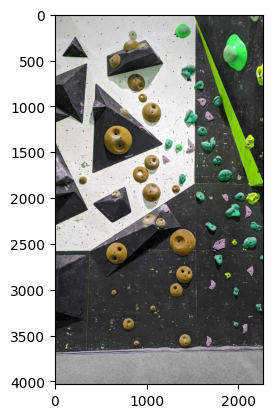

In [29]:
transform = A.Compose([
    A.ChannelShuffle(p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

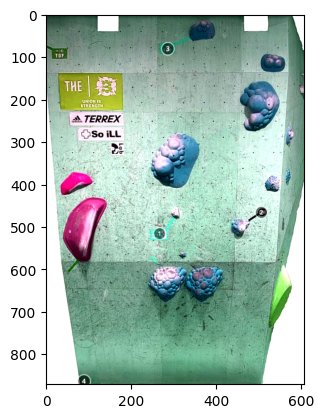

In [57]:
transform = A.Compose([
    A.ColorJitter(hue=1, p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

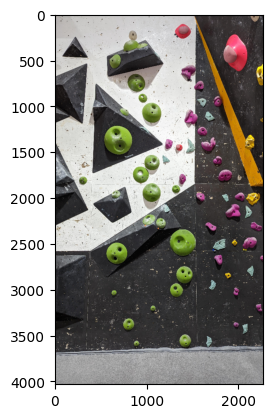

In [42]:
transform = A.Compose([
    A.Downscale(p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

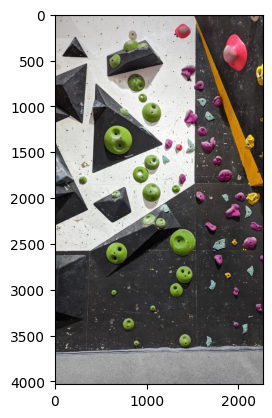

In [51]:
### Enhance image "relief"
transform = A.Compose([
    A.Emboss(alpha=1, strength=(0.9,1), p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

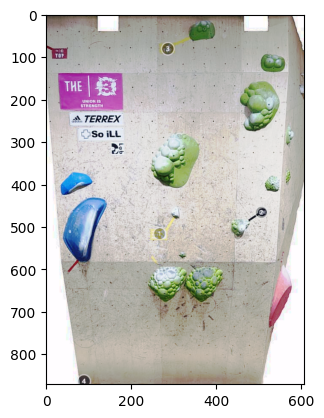

In [71]:
reference_image = local_config["PATH"]["coco_routes"]+"4.jpg"
transform = A.Compose([
    A.HistogramMatching(reference_images=[reference_image], blend_ratio=(0.75,0.75), p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

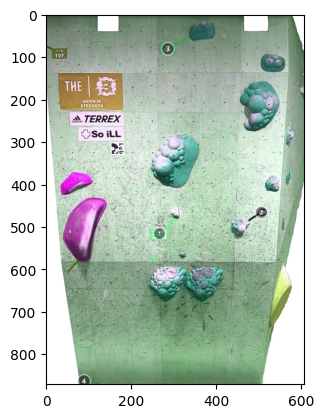

In [82]:
transform = A.Compose([
    A.HueSaturationValue(hue_shift_limit=50, sat_shift_limit=10, p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

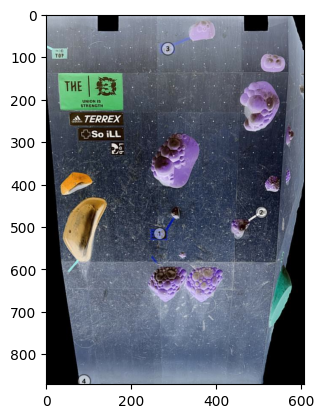

In [83]:
transform = A.Compose([
    A.InvertImg(p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)

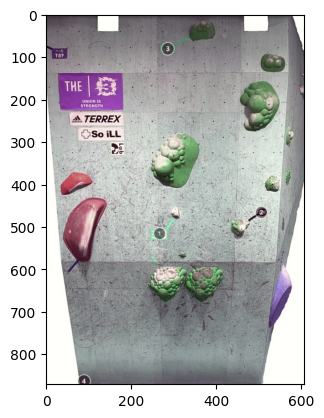

In [93]:
reference_image = local_config["PATH"]["coco_routes"]+"133.jpg"
transform = A.Compose([
    A.PixelDistributionAdaptation([reference_image], blend_ratio=(0.75,1), p=1),
])
transformed_image = transform(image=test_image)["image"]
plt.imshow(transformed_image)